<a href="https://colab.research.google.com/github/TsygankovNik/rte/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Новый раздел

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


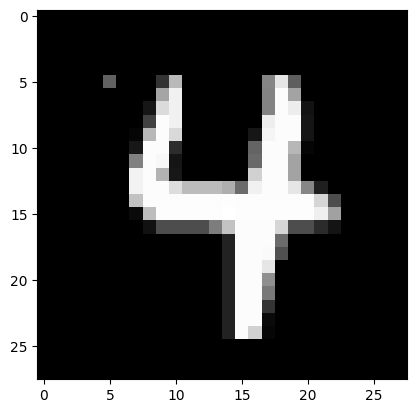

4
Shape of transformed X train: (60000, 784)
Shape of transformed y train: (60000, 10)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 300)               235500    
                                                                 
 dense_25 (Dense)            (None, 100)               30100     
                                                                 
 dense_26 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1688/1688 [==============================] - 10s 6ms/step - loss: 2.1773 - accuracy: 0.3705 - val_loss: 1.9929 - val_accuracy: 0.6058
Epoch 2/100
1688/1688 [==============================] - 10s 6ms/step - lo

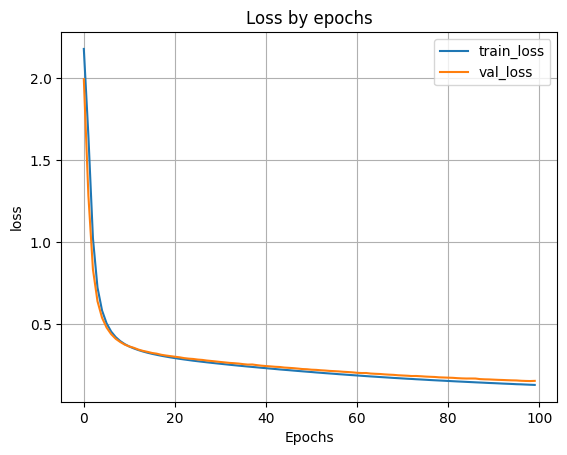

313/313 [==============================] - 1s 3ms/step - loss: 0.1506 - accuracy: 0.9561
Loss on test data: 0.1506204456090927
Accuracy on test data: 0.9560999870300293


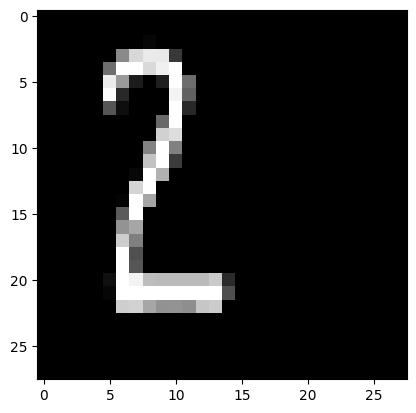

1/1 [==============================] - 0s 65ms/step
I think it's  2


In [9]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 10000,
train_size = 60000,
random_state = 123)
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
# вывод изображения
plt.imshow(X_train[123], cmap=plt.get_cmap('gray'))
plt.show()
# вывод метки для этого изображения
print(y_train[123])
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)
# переведем метки в one-hot
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]
from keras.models import Sequential
from keras.layers import Dense
# 1. создаем модель - объявляем ее объектом класса Sequential
model = Sequential()
# 2. добавляем первый скрытый слой
model.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
# 3. добавляем второй скрытый слой
model.add(Dense(units=100, activation='sigmoid'))
# 4. добавляем выходной слой
model.add(Dense(units=num_classes, activation='softmax'))
# 5. компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# вывод информации об архитектуре модели
print(model.summary())
# Обучаем модель
H = model.fit(X_train, y_train, validation_split=0.1, epochs=100)
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('2 test.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)
# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)
# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))